EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-1024
Execution time: 883.399 seconds.
Precision:  0.351
Top_dict with 135.3203125 kbytes.
Find:359
Top_ARE: 1.5770
Top_AAE: 11981.4791
Estimate time:  0.386 seconds.


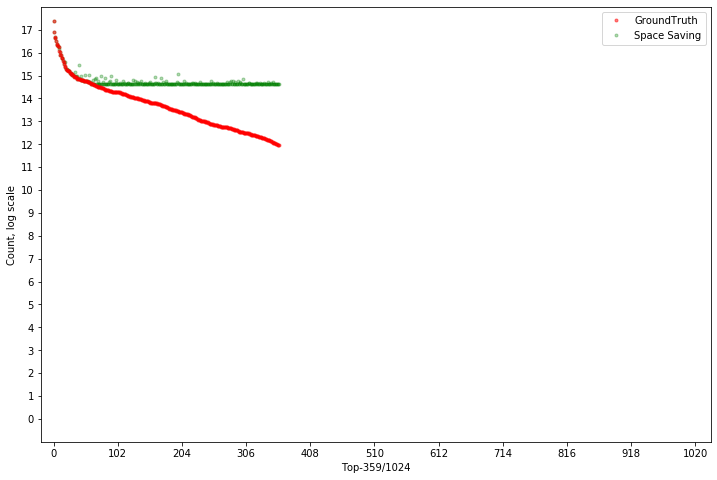

In [1]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import time
import os

from pympler import asizeof
import re
import pandas as pd
dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path
    
# =============================Initialize=============================
w=0
d=0
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Top_dict=dict()

#item_count=100
# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                e=str(e[:4])
                item=DS.Tail(e,1)
                #item_count-=1
                # print("read {}th element: {}".format(item_count,element))
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        min_ele = min(Top_dict, key=Top_dict.get)
                            # find e_min
                        Top_dict[item.ID]=Top_dict[min_ele]+1
                            # update c_min
                        Top_dict.pop(min_ele)
                            # pop old min out
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Top-{}".format(TC.size))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
tempdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
ss_result_dict=dict(tempdf[:TC.topk].values)
tp_set,precision=TF.Get_precision(gr_path,ss_result_dict,TC.topk)
    # Top-1024 in Top_dict compare to ground truth
print("Precision: {:6.3f}".format(precision))
    
# memory usage
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,ss_result_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_topk_compare(gr_path,Top_dict,'Space Saving')

# result to csv
import pandas as pd

path="..\\result\\SS\\"+dataset+"\\Top_"+str(TC.size)
filename='SS_'+str(size)+'_'+dataset+'.csv'
df=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
df['Element'] = df['Element'].astype(str)
df.to_csv(os.path.join(path,filename),index=False)

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-2048
Execution time:1400.132 seconds.
Precision:  0.554
Top_dict with 270.5625 kbytes.
Find:567
Top_ARE: 0.4362
Top_AAE: 2769.2205
Estimate time:  0.383 seconds.


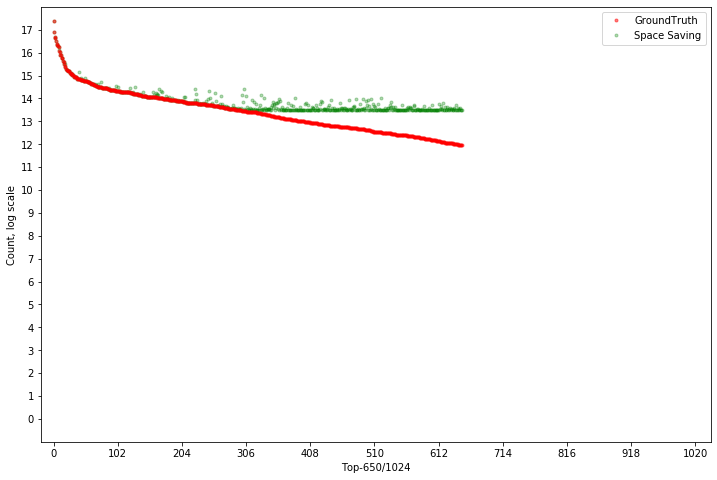

In [2]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import time
import os

from pympler import asizeof
import re
import pandas as pd
dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path
    
# =============================Initialize=============================
w=0
d=0
size=2048
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Top_dict=dict()

#item_count=100
# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                e=str(e[:4])
                item=DS.Tail(e,1)
                #item_count-=1
                # print("read {}th element: {}".format(item_count,element))
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        min_ele = min(Top_dict, key=Top_dict.get)
                            # find e_min
                        Top_dict[item.ID]=Top_dict[min_ele]+1
                            # update c_min
                        Top_dict.pop(min_ele)
                            # pop old min out
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Top-{}".format(TC.size))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
tempdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
ss_result_dict=dict(tempdf[:TC.topk].values)
tp_set,precision=TF.Get_precision(gr_path,ss_result_dict,TC.topk)
    # Top-1024 in Top_dict compare to ground truth
print("Precision: {:6.3f}".format(precision))
    
# memory usage
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,ss_result_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_topk_compare(gr_path,Top_dict,'Space Saving')

# result to csv
import pandas as pd

path="..\\result\\SS\\"+dataset+"\\Top_"+str(TC.size)
filename='SS_'+str(size)+'_'+dataset+'.csv'
df=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
df['Element'] = df['Element'].astype(str)
df.to_csv(os.path.join(path,filename),index=False)

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-3072
Execution time:1839.983 seconds.
Precision:  0.683
Top_dict with 442.125 kbytes.
Find:699
Top_ARE: 0.1688
Top_AAE: 1025.3162
Estimate time:  0.370 seconds.


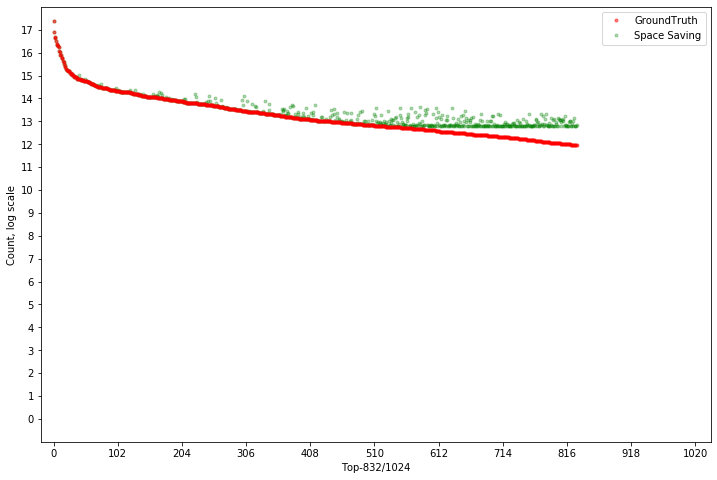

In [3]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import time
import os

from pympler import asizeof
import re
import pandas as pd
dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path
    
# =============================Initialize=============================
w=0
d=0
size=3072
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Top_dict=dict()

#item_count=100
# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                e=str(e[:4])
                item=DS.Tail(e,1)
                #item_count-=1
                # print("read {}th element: {}".format(item_count,element))
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        min_ele = min(Top_dict, key=Top_dict.get)
                            # find e_min
                        Top_dict[item.ID]=Top_dict[min_ele]+1
                            # update c_min
                        Top_dict.pop(min_ele)
                            # pop old min out
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Top-{}".format(TC.size))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
tempdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
ss_result_dict=dict(tempdf[:TC.topk].values)
tp_set,precision=TF.Get_precision(gr_path,ss_result_dict,TC.topk)
    # Top-1024 in Top_dict compare to ground truth
print("Precision: {:6.3f}".format(precision))
    
# memory usage
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,ss_result_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_topk_compare(gr_path,Top_dict,'Space Saving')

# result to csv
import pandas as pd

path="..\\result\\SS\\"+dataset+"\\Top_"+str(TC.size)
filename='SS_'+str(size)+'_'+dataset+'.csv'
df=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
df['Element'] = df['Element'].astype(str)
df.to_csv(os.path.join(path,filename),index=False)

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-4096
Execution time:2274.836 seconds.
Precision:  0.814
Top_dict with 541.6953125 kbytes.
Find:834
Top_ARE: 0.0883
Top_AAE: 530.0012
Estimate time:  0.376 seconds.


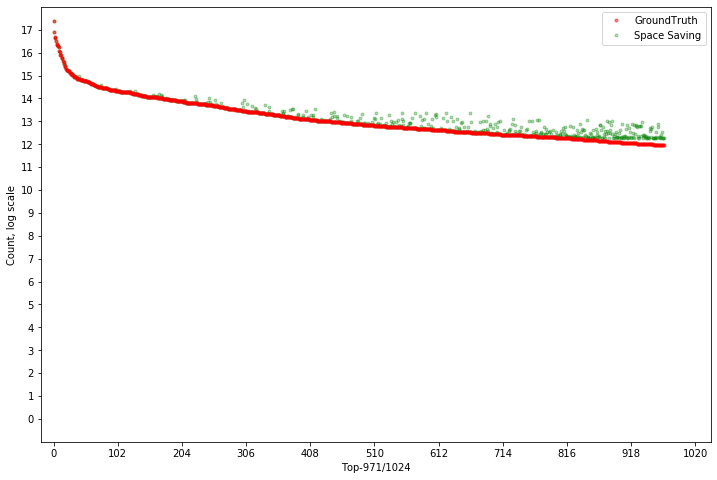

In [4]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import time
import os

from pympler import asizeof
import re
import pandas as pd
dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path
    
# =============================Initialize=============================
w=0
d=0
size=4096
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Top_dict=dict()

#item_count=100
# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                e=str(e[:4])
                item=DS.Tail(e,1)
                #item_count-=1
                # print("read {}th element: {}".format(item_count,element))
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        min_ele = min(Top_dict, key=Top_dict.get)
                            # find e_min
                        Top_dict[item.ID]=Top_dict[min_ele]+1
                            # update c_min
                        Top_dict.pop(min_ele)
                            # pop old min out
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Top-{}".format(TC.size))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
tempdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
ss_result_dict=dict(tempdf[:TC.topk].values)
tp_set,precision=TF.Get_precision(gr_path,ss_result_dict,TC.topk)
    # Top-1024 in Top_dict compare to ground truth
print("Precision: {:6.3f}".format(precision))
    
# memory usage
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,ss_result_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_topk_compare(gr_path,Top_dict,'Space Saving')

# result to csv
import pandas as pd

path="..\\result\\SS\\"+dataset+"\\Top_"+str(TC.size)
filename='SS_'+str(size)+'_'+dataset+'.csv'
df=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
df['Element'] = df['Element'].astype(str)
df.to_csv(os.path.join(path,filename),index=False)

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-5120
Execution time:2670.472 seconds.
Precision:  0.877
Top_dict with 641.3671875 kbytes.
Find:898
Top_ARE: 0.0569
Top_AAE: 341.9254
Estimate time:  0.391 seconds.


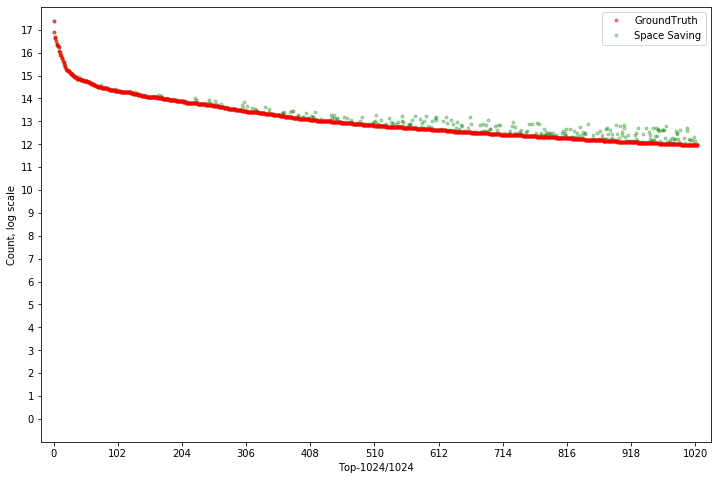

In [5]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import time
import os

from pympler import asizeof
import re
import pandas as pd
dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path
    
# =============================Initialize=============================
w=0
d=0
size=5120
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Top_dict=dict()

#item_count=100
# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                e=str(e[:4])
                item=DS.Tail(e,1)
                #item_count-=1
                # print("read {}th element: {}".format(item_count,element))
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        min_ele = min(Top_dict, key=Top_dict.get)
                            # find e_min
                        Top_dict[item.ID]=Top_dict[min_ele]+1
                            # update c_min
                        Top_dict.pop(min_ele)
                            # pop old min out
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Top-{}".format(TC.size))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
tempdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
ss_result_dict=dict(tempdf[:TC.topk].values)
tp_set,precision=TF.Get_precision(gr_path,ss_result_dict,TC.topk)
    # Top-1024 in Top_dict compare to ground truth
print("Precision: {:6.3f}".format(precision))
    
# memory usage
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,ss_result_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_topk_compare(gr_path,Top_dict,'Space Saving')

# result to csv
import pandas as pd

path="..\\result\\SS\\"+dataset+"\\Top_"+str(TC.size)
filename='SS_'+str(size)+'_'+dataset+'.csv'
df=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
df['Element'] = df['Element'].astype(str)
df.to_csv(os.path.join(path,filename),index=False)

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-6144
Execution time:2955.812 seconds.
Precision:  0.910
Top_dict with 884.8671875 kbytes.
Find:932
Top_ARE: 0.0413
Top_AAE: 248.3004
Estimate time:  0.392 seconds.


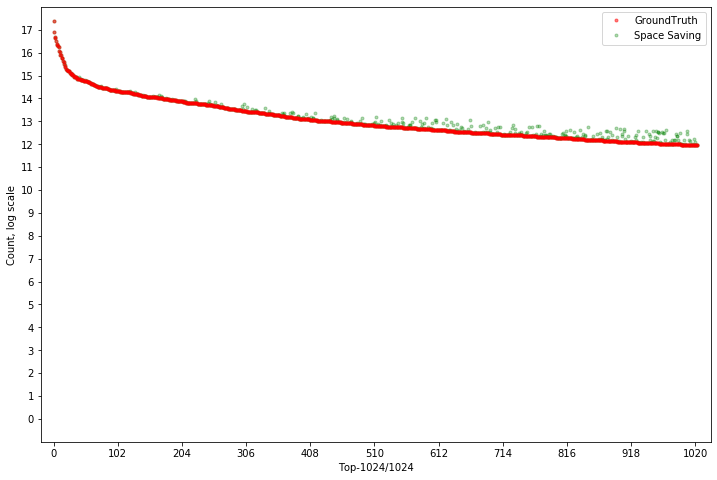

In [6]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import time
import os

from pympler import asizeof
import re
import pandas as pd
dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path
    
# =============================Initialize=============================
w=0
d=0
size=6144
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Top_dict=dict()

#item_count=100
# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                e=str(e[:4])
                item=DS.Tail(e,1)
                #item_count-=1
                # print("read {}th element: {}".format(item_count,element))
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        min_ele = min(Top_dict, key=Top_dict.get)
                            # find e_min
                        Top_dict[item.ID]=Top_dict[min_ele]+1
                            # update c_min
                        Top_dict.pop(min_ele)
                            # pop old min out
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Top-{}".format(TC.size))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
tempdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
ss_result_dict=dict(tempdf[:TC.topk].values)
tp_set,precision=TF.Get_precision(gr_path,ss_result_dict,TC.topk)
    # Top-1024 in Top_dict compare to ground truth
print("Precision: {:6.3f}".format(precision))
    
# memory usage
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,ss_result_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_topk_compare(gr_path,Top_dict,'Space Saving')

# result to csv
import pandas as pd

path="..\\result\\SS\\"+dataset+"\\Top_"+str(TC.size)
filename='SS_'+str(size)+'_'+dataset+'.csv'
df=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
df['Element'] = df['Element'].astype(str)
df.to_csv(os.path.join(path,filename),index=False)

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-7168
Execution time:3263.007 seconds.
Precision:  0.928
Top_dict with 984.40625 kbytes.
Find:950
Top_ARE: 0.0318
Top_AAE: 191.6305
Estimate time:  0.354 seconds.


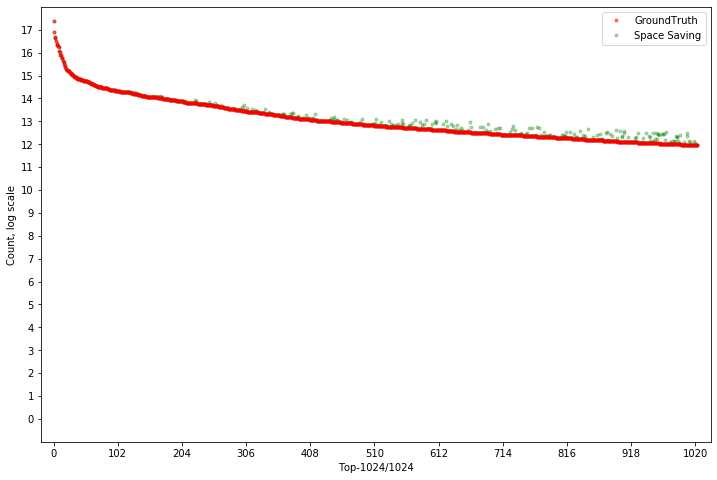

In [7]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import time
import os

from pympler import asizeof
import re
import pandas as pd
dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path
    
# =============================Initialize=============================
w=0
d=0
size=7168
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Top_dict=dict()

#item_count=100
# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                e=str(e[:4])
                item=DS.Tail(e,1)
                #item_count-=1
                # print("read {}th element: {}".format(item_count,element))
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        min_ele = min(Top_dict, key=Top_dict.get)
                            # find e_min
                        Top_dict[item.ID]=Top_dict[min_ele]+1
                            # update c_min
                        Top_dict.pop(min_ele)
                            # pop old min out
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Top-{}".format(TC.size))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
tempdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
ss_result_dict=dict(tempdf[:TC.topk].values)
tp_set,precision=TF.Get_precision(gr_path,ss_result_dict,TC.topk)
    # Top-1024 in Top_dict compare to ground truth
print("Precision: {:6.3f}".format(precision))
    
# memory usage
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,ss_result_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_topk_compare(gr_path,Top_dict,'Space Saving')

# result to csv
import pandas as pd

path="..\\result\\SS\\"+dataset+"\\Top_"+str(TC.size)
filename='SS_'+str(size)+'_'+dataset+'.csv'
df=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
df['Element'] = df['Element'].astype(str)
df.to_csv(os.path.join(path,filename),index=False)

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-8192
Execution time:3589.295 seconds.
Precision:  0.943
Top_dict with 1083.875 kbytes.
Find:966
Top_ARE: 0.0255
Top_AAE: 153.4710
Estimate time:  0.390 seconds.


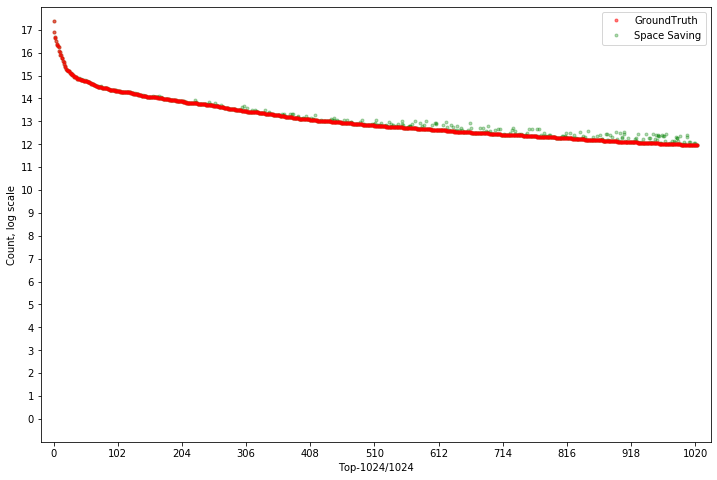

In [8]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import time
import os

from pympler import asizeof
import re
import pandas as pd
dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path
    
# =============================Initialize=============================
w=0
d=0
size=8192
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Top_dict=dict()

#item_count=100
# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                e=str(e[:4])
                item=DS.Tail(e,1)
                #item_count-=1
                # print("read {}th element: {}".format(item_count,element))
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        min_ele = min(Top_dict, key=Top_dict.get)
                            # find e_min
                        Top_dict[item.ID]=Top_dict[min_ele]+1
                            # update c_min
                        Top_dict.pop(min_ele)
                            # pop old min out
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Top-{}".format(TC.size))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
tempdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
ss_result_dict=dict(tempdf[:TC.topk].values)
tp_set,precision=TF.Get_precision(gr_path,ss_result_dict,TC.topk)
    # Top-1024 in Top_dict compare to ground truth
print("Precision: {:6.3f}".format(precision))
    
# memory usage
print("Top_dict with {} kbytes.".format(asizeof.asizeof(Top_dict)/1024))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,ss_result_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_topk_compare(gr_path,Top_dict,'Space Saving')

# result to csv
import pandas as pd

path="..\\result\\SS\\"+dataset+"\\Top_"+str(TC.size)
filename='SS_'+str(size)+'_'+dataset+'.csv'
df=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
df['Element'] = df['Element'].astype(str)
df.to_csv(os.path.join(path,filename),index=False)

In [22]:
gdf=pd.read_csv(gr_path)
rdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
gdf=gdf[:topk]
rdf=rdf[:topk]
testdf=gdf.merge(rdf,how='inner',on='Element',suffixes=('truth', 'result'))


966

In [37]:
testdf=gdf.merge(rdf,how='inner',on='Element',suffixes=('_t', '_r'))
testdf

,Element,Count_t,Count_r
0,b'\xd2\x1d9\xfa',168915,168915
1,b'\xc6X\xda\x88',122440,122440
2,b'\xb7\xf6h\xd0',106016,106018
3,b'E.\x1c)',103233,103233
4,"b'c\x9e,\xb5'",93998,93998
...,...,...,...
961,b'lw\x05\x7f',4041,4368
962,"b""\xcf\x88\xea'""",4032,5027
963,b'r\x08\r$',4028,5405
964,b'f\x1c\xf9K',4002,4410


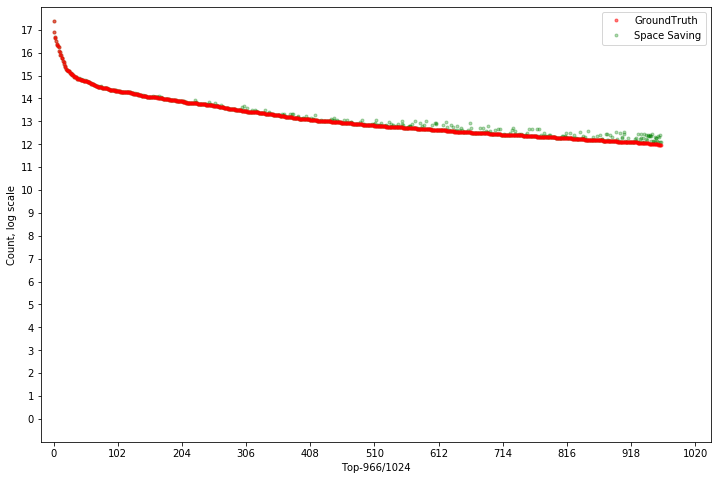

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def Plot_topk_comparex(ground_truth_path,result_dict,method):
    #ground_truth_path:csv
    gt_df=pd.read_csv(ground_truth_path)
    gt_df=gt_df[:TC.topk]
    
    result_df=pd.DataFrame(result_dict.items(),columns=['Element','Count'])
    result_df=result_df[:TC.topk]
    
    tp_df=gt_df.merge(result_df,how='inner',on='Element',suffixes=('_t', '_r'))

    # set max y ticks
    max_element=max(max(tp_df['Count_t']),max(tp_df['Count_r']))
    y_max=int(np.log2(max_element))     
    
    x_index=[i for i in range (len(tp_df))]
    #plt.figure()
    plt.figure(figsize=[12,8])
    #plt.xticks([j for j in range(0,len(tp_list),50)])
    plt.xticks([j for j in range(0,int(TC.topk*1.02),int(TC.topk/10))])
    plt.yticks([j for j in range(0,y_max+1)])
    plt.xlim(-int(TC.topk*0.02),int(TC.topk*1.02))
    plt.ylim(-1,y_max+1)
    plt.xlabel('Top-{}/{}'.format(len(tp_df),TC.topk))
    plt.ylabel('Count, log scale')
    
    #my_line,=plt.plot(indexli,np.log2(my_count),'g.',label=method,alpha=0.7)
    my_line,=plt.plot(x_index,np.log2(list(tp_df['Count_r'])),'g.',label=method,alpha=0.3)
    gr_line,=plt.plot(x_index,np.log2(list(tp_df['Count_t'])),'r.',label='GroundTruth',alpha=0.5)
    plt.legend(handles=[gr_line,my_line],loc='best')
    plt.show()
    
Plot_topk_comparex(gr_path,Top_dict,'Space Saving')